In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import random


In [3]:
# with open('results/experiments.json', 'r') as f:
#     data = json.load(f)
# df = pd.DataFrame(data)

In [4]:
Xtrain = np.load('data/Xtrain.npy')
print(Xtrain.shape)

(1372529, 994)


In [5]:
ytrain = np.load('data/ytrain.npy')
print(ytrain.shape)

(1372529, 12)


In [6]:
Xdev = np.load('data/Xdev.npy')
ydev = np.load('data/ydev.npy')
print(Xdev.shape)

(13863, 994)


In [7]:
Xtest = np.load('data/Xtest.npy')
ytest = np.load('data/ytest.npy')
print(Xtest.shape)

(478934, 994)


In [8]:
wl_names = [
     'AR_exchange_06',
 'AR_sharepoint_06',
 'AR_skype_06',
 'AR_teams_06',
 'AR_od4b_06',
 'AR_onenote_06',
 'AR_word_06',
 'AR_excel_06',
 'AR_powerpoint_06',
 'AR_outlook_06',
 'AR_eslt_06',
 'AR_officeclient_06'
]

## Check the usage distribution for Dev vs Test, and Dev vs Train

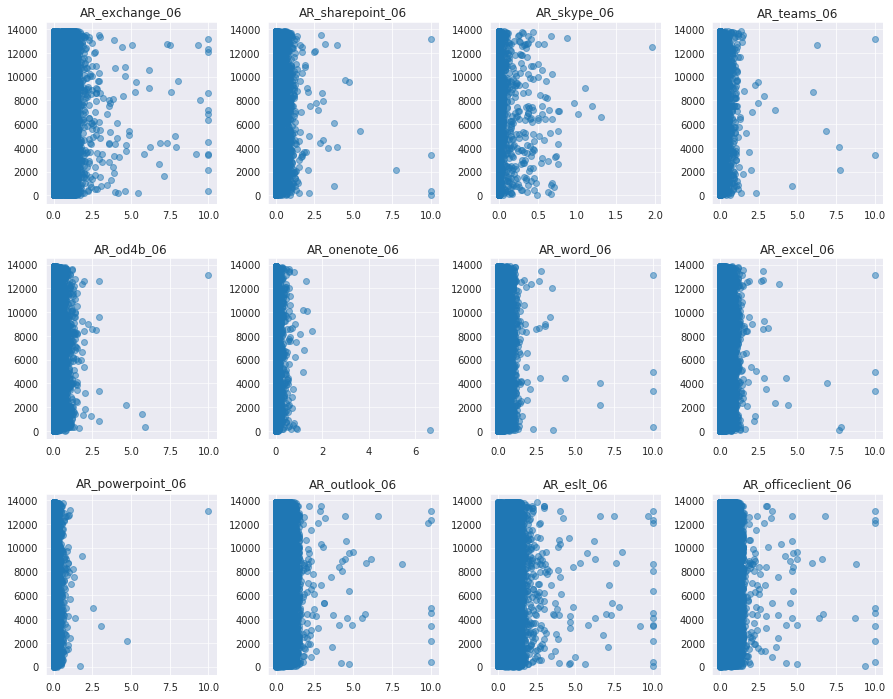

In [16]:
ydev_clip = np.clip(ydev, 0, 10)

fig = plt.figure(figsize=(15, 12))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
n_max = ydev.shape[0]

for i in range(0, 12):
    
    ax = fig.add_subplot(3, 4, (i+1))
    plt.grid(axis='y', alpha=0.75)
    ax.scatter(x=ydev_clip[:,i], y=range(0,n_max), alpha=0.5)
    ax.set_title(wl_names[i])
#               ,fontsize=14, ha='center')

fig.savefig('plots/ydev_usage_scatter.png')

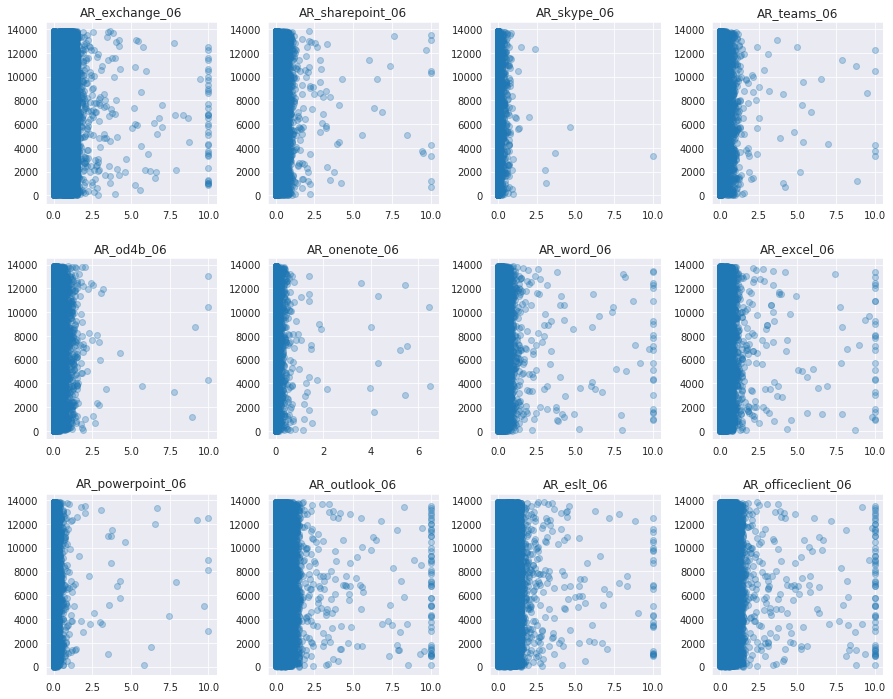

In [19]:
ytest_sample = ytest[:n_max,:]
ytest_clip = np.clip(ytest_sample, 0, 10)
# n_max = ytest.shape[0]

fig = plt.figure(figsize=(15, 12))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

for i in range(0, 12):
    ax = fig.add_subplot(3, 4, (i+1))
    ax.scatter(x=ytest_clip[:,i], y=range(0,n_max), alpha=0.3)
    ax.set_title(wl_names[i])
    
fig.savefig('plots/ytest_usage_scatter.png')

In [11]:
dev_mean = np.mean(ydev, axis=0)
train_mean = np.mean(ytrain, axis=0)

print(dev_mean - train_mean)

[-8.14089346e-05  1.37105470e-03 -1.47534323e-03  1.58730849e-03
  2.26132047e-03 -4.35008770e-04  1.04030067e-03  2.07490747e-03
  2.19887681e-04 -4.37372231e-04 -1.28246449e-04  1.24268360e-03]


In [12]:
dev_std = np.std(ydev, axis=0)
train_std = np.std(ytrain, axis=0)

print(dev_std - train_std)

[-0.14323455 -0.22757319 -0.11266554  0.07275853  0.34876593 -0.00584497
  0.01533644  0.2350838   0.03618698  0.28842816  0.14115881  0.26137659]


In [18]:


# ydev_clip = np.clip(ydev, 0, 10)
# sns.set_style('darkgrid')
# sns.distplot(ydev_clip[:,0])

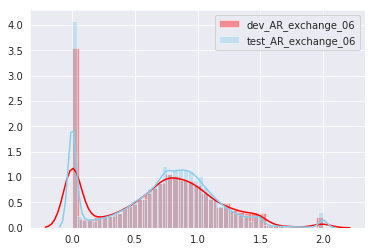

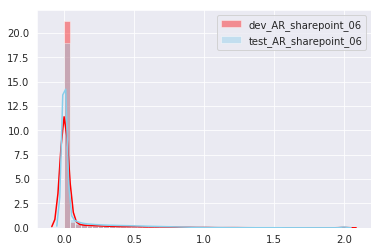

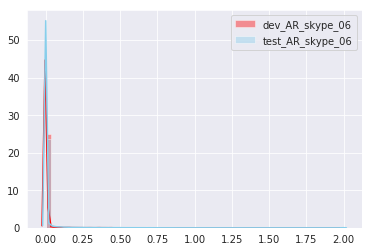

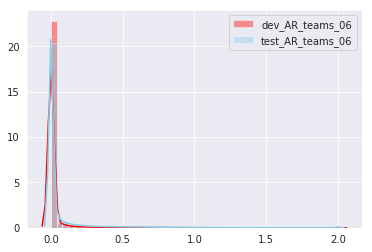

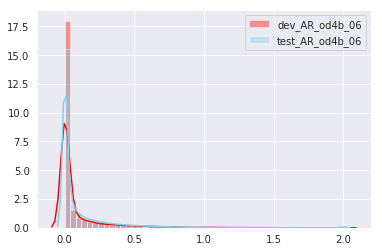

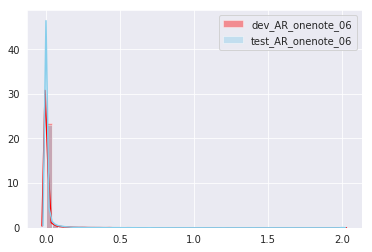

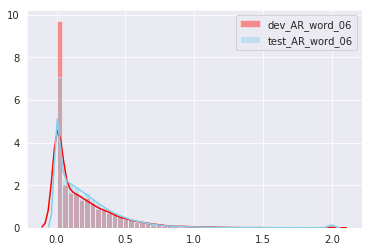

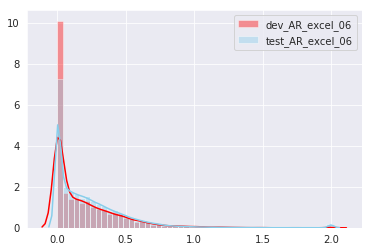

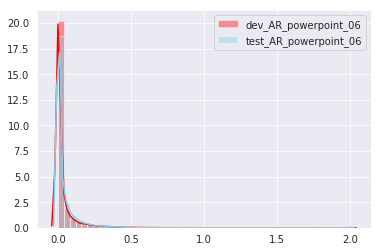

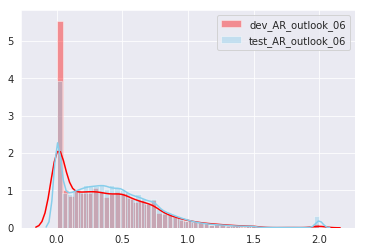

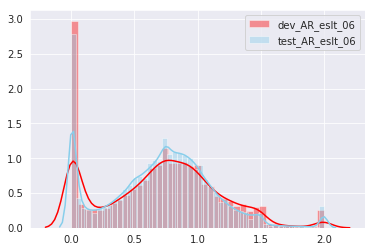

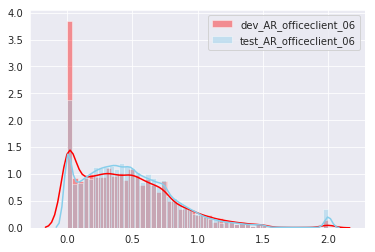

In [20]:
ydev_clip = np.clip(ydev, 0, 2)
ytest_clip = np.clip(ytest, 0, 2)

for i in range(0,12):
    sns.set_style('darkgrid')
    sns.distplot(ydev_clip[:,i], norm_hist=True, color="red", label='dev_{}'.format(wl_names[i]))
    sns.distplot(ytest_clip[:,i], norm_hist=True, color="skyblue", label='test_{}'.format(wl_names[i]))
    plt.legend()
    plt.savefig('plots/{}_devVStest_usage_hist.png'.format(wl_names[i]))
    plt.show() 

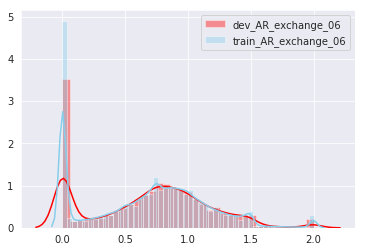

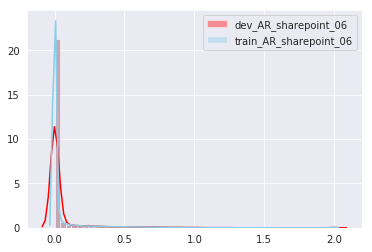

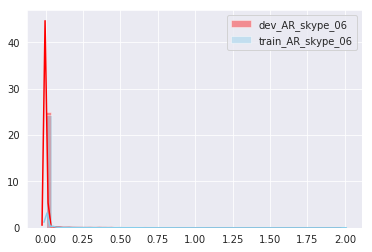

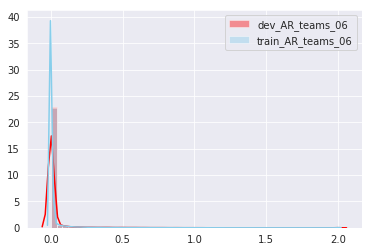

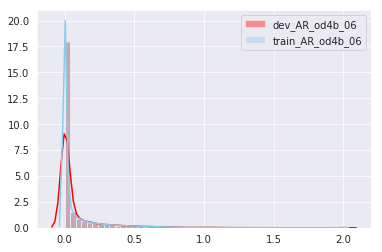

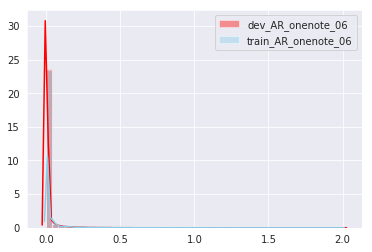

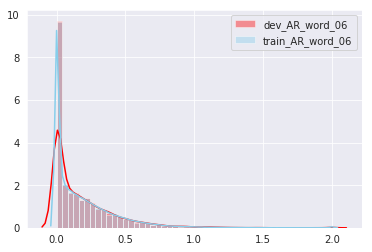

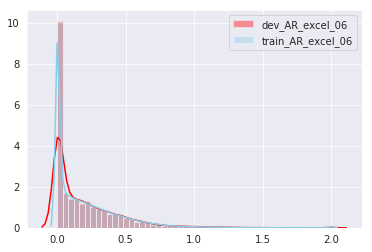

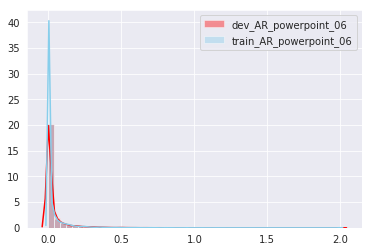

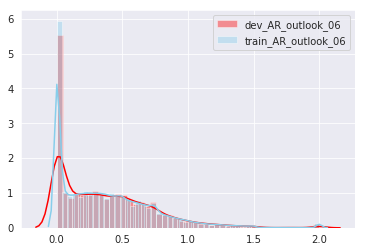

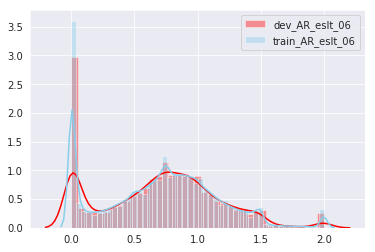

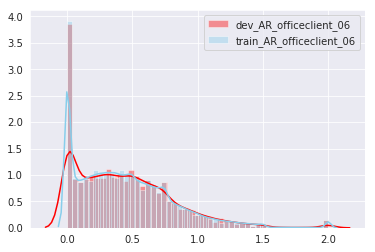

In [22]:
ydev_clip = np.clip(ydev, 0, 2)
ytrain_clip = np.clip(ytrain, 0, 2)

for i in range(0,12):
    sns.set_style('darkgrid')
    sns.distplot(ydev_clip[:,i], norm_hist=True, color="red", label='dev_{}'.format(wl_names[i]))
    sns.distplot(ytrain_clip[:,i], norm_hist=True, color="skyblue", label='train_{}'.format(wl_names[i]))
    plt.legend()
    plt.savefig('plots/{}_devVStrain_usage_hist.png'.format(wl_names[i]))
    plt.show() 